# Clustering Jerárquico en el Dataset Zoo
Yanko Acuña Villaseca

## Paso 1: Cargar el dataset

In [2]:
import pandas as pd

# Cargar el dataset desde UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
column_names = ["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic",
                "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs",
                "tail", "domestic", "catsize", "type"]
df = pd.read_csv(url, names=column_names)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)


In [3]:
# Separar la columna 'animal_name' para usarla como etiqueta después
# 'type' es la variable objetivo/clase, se excluye del clustering no supervisado.
animal_names = df['animal_name']
df_processed = df.drop(columns=["animal_name", "type"])

print("\nDataset después de excluir 'animal_name' y 'type' (primeras 5 filas):")
print(df_processed.head())

# Verificar los tipos de datos. Para el dataset Zoo, la mayoría son binarias.
# La columna 'legs' es numérica y tiene un rango mayor, por lo que el escalado es importante.
print("\nTipos de datos de las características antes de escalar:")
print(df_processed.dtypes)


Dataset después de excluir 'animal_name' y 'type' (primeras 5 filas):
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
2         0         0     1     0     1         0        0  
3         1         0     0     4     0         0        1  
4         1         0     0     4     1         0        1  

Tipos de datos de las características antes de escalar:
hair        int64
f

In [33]:
# Escalar los datos con StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_processed)

# Convertir de nuevo a DataFrame para mantener los nombres de las columnas
scaled_features_df = pd.DataFrame(scaled_features, columns=df_processed.columns)

print("\nDataset escalado (primeras 5 filas):")
print(scaled_features_df.head())


Dataset escalado (primeras 5 filas):
       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
1  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208 -1.115547   
2 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710  0.896421   
3  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
4  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
1  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   
2  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435  0.588784   
3  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
4  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   

   domestic   catsize  
0 -0.384353  1.138180  
1 -0.384353 

## Paso 3: Clustering Jerárquico


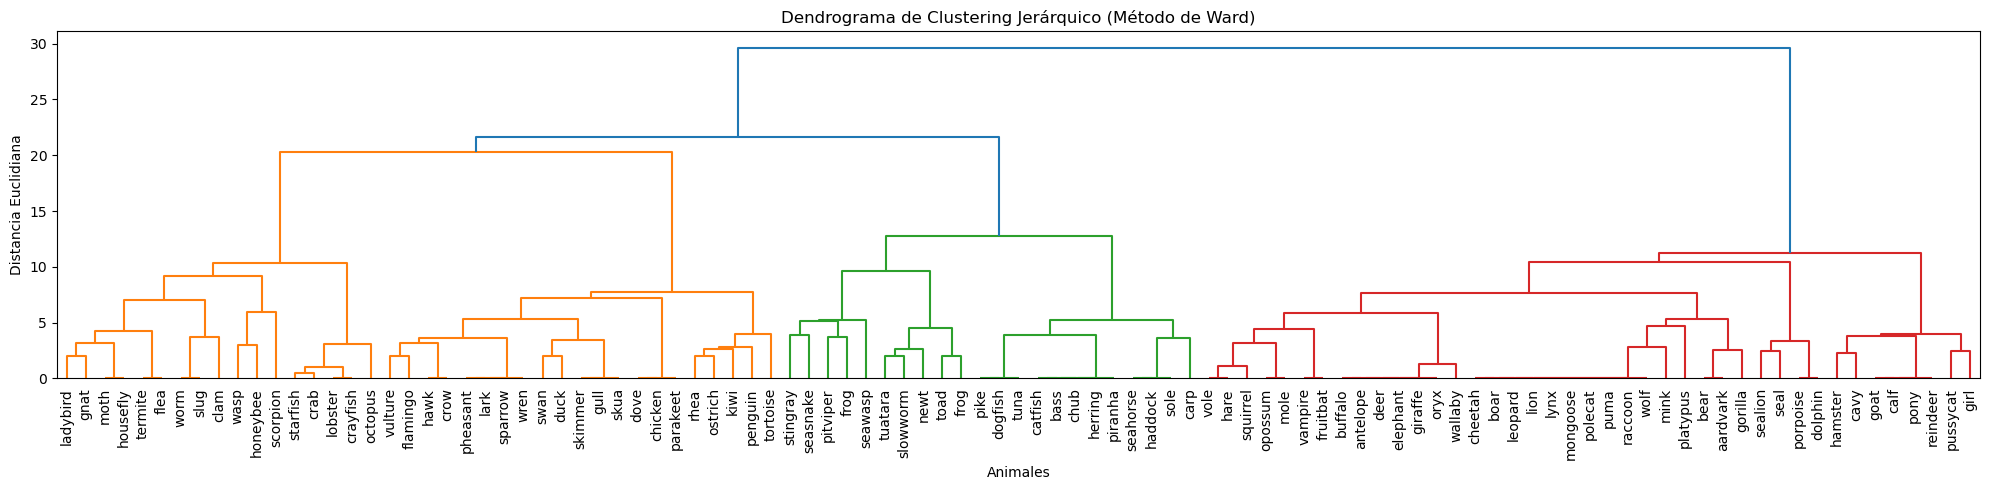

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt

# Método de Ward para linkage
linked = linkage(scaled_features, method='ward')

# Dendrograma
plt.figure(figsize=(20, 5))
dendrogram(
    linked,
    orientation='top',
    labels=animal_names.values, # Usar los nombres de los animales como etiquetas
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_font_size=10
)
plt.title("Dendrograma de Clustering Jerárquico (Método de Ward)")
plt.xlabel("Animales")
plt.ylabel("Distancia Euclidiana")
plt.tight_layout()
plt.show()


## Paso 4: Heatmap


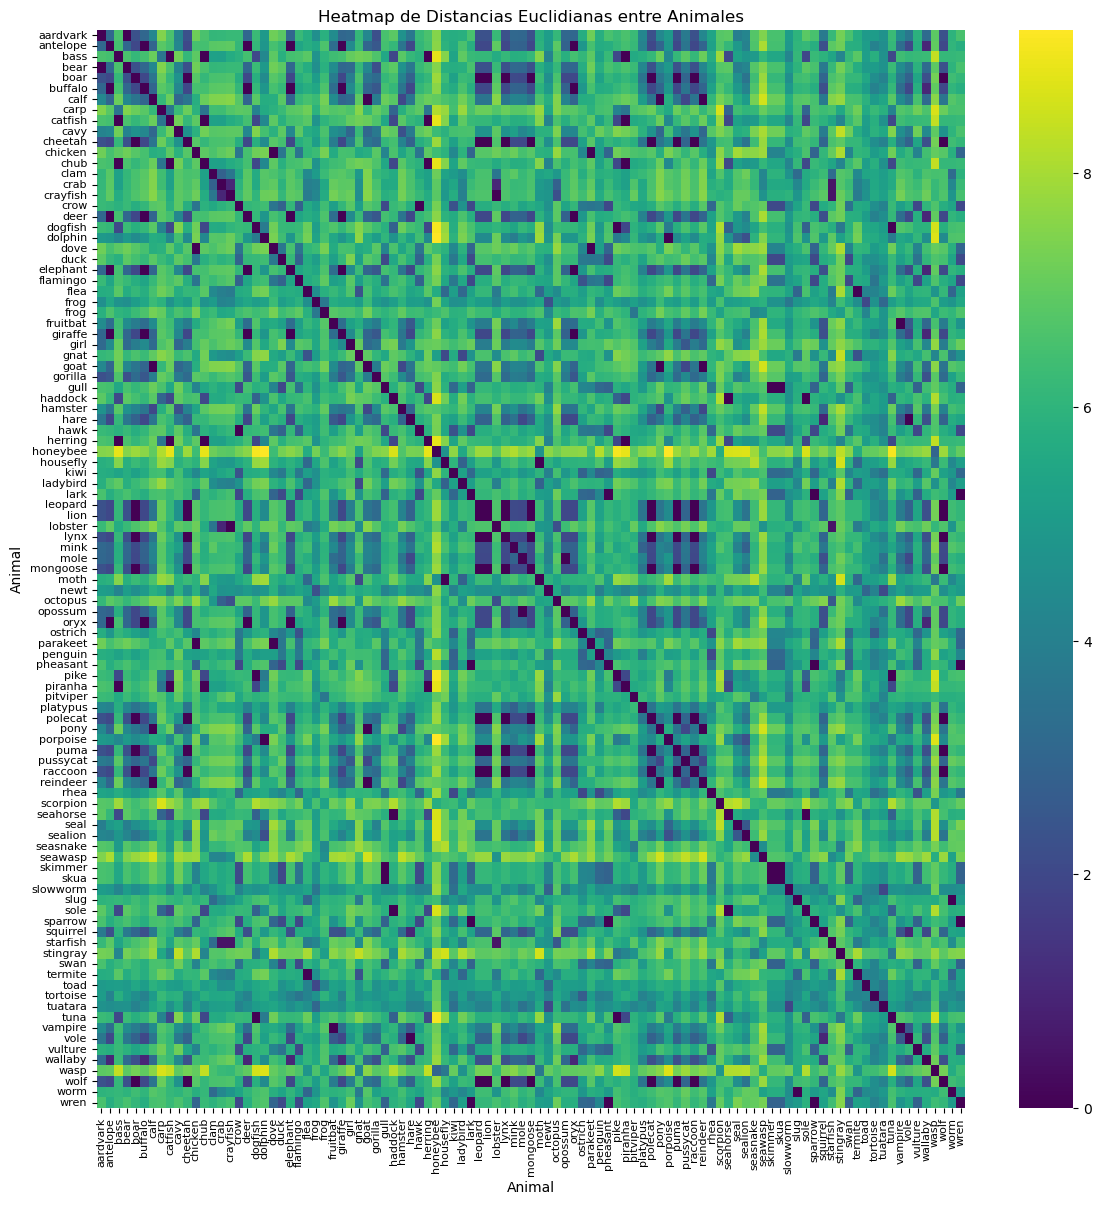

In [32]:
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# Matriz de distancias
dist_matrix = squareform(pdist(scaled_features, metric='euclidean'))
plt.figure(figsize=(14, 14))
ax = sns.heatmap(dist_matrix, cmap="viridis", xticklabels=animal_names.values, yticklabels=animal_names.values)
plt.title("Heatmap de Distancias Euclidianas entre Animales")
plt.xlabel("Animal")
plt.ylabel("Animal")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


# Conclusiones
Los gráficos permiten visualizar cómo se agrupan los datos del dataset Zoo según su similitud. El dendrograma, con el método de Ward, muestra claramente una jerarquía de fusiones que agrupa a los animales en categorías biológicamente coherentes, como mamíferos, aves, peces, etc., basadas en sus características morfológicas y de comportamiento. Las divisiones principales del dendrograma reflejan estas clasificaciones naturales. El heatmap revela zonas de alta y baja distancia entre pares de datos, mostrando la relacion entre las especies de animales.


## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

A simple vista, el dendrograma muestra 3 grandes agrupaciones principales, observables al cortar el árbol en un punto con distancia moderada. También se puede apreciar una segmentación más detallada en 5 clústeres, este número podria aumentar si se sigue buscando cluster más específicos.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Las características que más parecen determinar la formación de los clusters son aquellas que definen las clasificaciones biológicas de los animales:
* **`hair` y `milk`**: Diferencian fuertemente a los mamíferos.
* **`feathers` y `airborne`**: Son definitorias para las aves.
* **`aquatic` y `fins`**: Fundamentales para agrupar peces.
* **`eggs`**: Divide animales según su reproducción, ovíparos o vivíparos.
* **`breathes`**: Relacionada con el tipo de respiración, separando, por ejemplo, los peces que no respiran aire de otros grupos.
* **`backbone`**: Clave para distinguir vertebrados de invertebrados.
* **`legs`**: Importante para diferenciar entre insectos (6 patas), arañas (8 patas) y otros animales.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Sí, los resultados del clustering tienen un alto sentido biológico y zoológico. Al observar los nombres de los animales en el dendrograma, se puede apreciar que los clusters formados agrupan consistentemente a animales con características biológicas compartidas. Por ejemplo:
* Los **mamíferos**, como lo son "giraffe", "boar", "antelope", "buffalo", "calf", "wolf", "elephant", "deer", "dolphin", etc, forma un gran grupo en el cluster rojo de este diagrama, caracterizados por `hair=1` y `milk=1`.
* Las **aves** como "crow", "gull", "flamingo", "penguin", "ostrich", con `feathers=1` y `eggs=1`, se pueden apreciar en el cluster naranjo.
* Los **peces** "bass", "pike", "carp", "haddock" forman un grupo distintivo con `aquatic=1` y `fins=1` en el cluster verde.
* Los **invertebrados y/o insectos** como  "gnat", "starfish", "ladybird", "slug", "wasp", "worm", "scorpion" se agrupan en base a la ausencia de `backbone` y sus características específicas de `legs`, los cuales se encuentran en el cluster naranjo.
Esto demuestra que el algoritmo ha identificado con éxito las agrupaciones naturales basadas en las propiedades zoológicas de los animales.
* Los **anfibios y reptiles** como "frog", "newt", "toad", "slowworm" forman clusters o sub-clusters cercanos, compartiendo características como la puesta de huevos pero sin pelo ni plumas. Estos se encuentran en el cluster verde.


## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

La normalización (o escalado) de los datos es crucial en el clustering, especialmente cuando se utilizan métodos basados en la distancia (como Ward, que utiliza distancias euclidianas). Afecta el clustering de la siguiente manera:
* **Evita el sesgo por escala:** Sin normalización, las características con rangos de valores más grandews, como `legs` que va de 0 a 8, tendrían un peso desproporcionadamente mayor en el cálculo de las distancias en comparación con las características binarias. Esto podría llevar a que el clustering esté dominado por unas pocas características de gran escala, ignorando la contribución de otras variables importantes pero de menor rango.
* **Contribución equitativa:** La normalización asegura que todas las características contribuyan de manera equitativa a la medición de la similitud o disimilitud entre las observaciones, permitiendo que el algoritmo capture la verdadera estructura de los datos sin sesgos por la magnitud de los valores.


## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Se utilizó el método de *linkage* de **Ward**, el cual se utilizó por las siguientes razones:
* **Minimiza la varianza intracúmulos:** busca fusionar los clusters de manera que la varianza total dentro de los nuevos clusters sea la mínima posible. Esto tiende a producir clusters más compactos y esféricos.
* **Produce clusters compactos y balanceados:** A diferencia de otros métodos, como *single* o *complete* linkage, que pueden producir clusters alargados o desequilibrados, Ward es conocido por generar agrupaciones más homogéneas y de tamaño similar, lo cual facilita su interpretación.
* **Basado en la distancia euclidiana:** El método de Ward es óptimo cuando se utiliza la distancia euclidiana al cuadrado, lo cual es coherente con la naturaleza de las características del dataset Zoo, muchas características binarias y una discreta que ha sido escalada.




## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Se podrían aplicar técnicas como:

* **K-Means:** Es un algoritmo de clustering basado en centroides, muy eficiente computacionalmente. Sería útil para una segmentación rápida y para probar si se obtienen agrupaciones similares a las observadas con el jerárquico si se predefine el número de clusters, por ejemplo, 7, como las clases de animales. Es bueno para datos esféricos y bien separados.

* **DBSCAN:** Es un algoritmo basado en la densidad que no requiere que se especifique el número de clusters de antemano y es capaz de identificar clusters de formas arbitrarias, así como de detectar *outliers*, animales que no encajan bien en ningún grupo principal. Sería interesante para ver si hay animales que se consideran "ruido" o casos atípicos en el dataset que no se agrupan densamente.

* **Agglomerative Clustering con diferentes métodos de linkage:** Sería instructivo aplicar otros métodos de *linkage* para comparar cómo la elección del método afecta la forma y la cohesión de los clusters. Esto permitiría entender la sensibilidad del resultado a la métrica de enlace y qué tan robustas son las agrupaciones.